# Phần 1: Kết nối với API của Spotify và lấy dữ liệu
Thu thập thêm các thông tin “sâu” hơn của bài hát như danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature

In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import requests
client_id='2a369d4afd1e4eccafe667acb8f35307'
client_secret='83cddef951f24cb186854950d345fd70'

In [4]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})
# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [9]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [10]:
df = pd.read_csv(r'E:\UEL\HocTap\Nam3\HKII\PhanTichDuLieuWeb\DOAn\data\data2017_2020.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Id_song
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-05,5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-05,7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-05,5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-05,4pdPtRcBmOSQDlJ3Fk945m
4,5,I Donâ€™t Wanna Live Forever (Fifty Shades Dar...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-05,3NdDpSvN911VPGivFlV5d0


In [11]:
co_Id_song=df["Id_song"]
print(co_Id_song)

0        5aAx2yezTd8zXrkmtKl66Z
1        7BKLCZ1jbUBVqRi2FVlTVw
2        5knuzwU65gJK7IF5yJsuaW
3        4pdPtRcBmOSQDlJ3Fk945m
4        3NdDpSvN911VPGivFlV5d0
                  ...          
41395    15k1TDabqSEmyXOwMq9RM7
41396    7GLWWrk1YlkPYqJK3ynIA0
41397    4JUPEh2DVSXFGExu4Uxevz
41398    4C6BlqqMwjFzOXzqpTeoWR
41399    2kS6td1yvmpNgZTt1q5pQq
Name: Id_song, Length: 41400, dtype: object


In [12]:
BASE_URL = 'https://api.spotify.com/v1/'
mylist=[]
for elem,next_elem in zip(co_Id_song, co_Id_song[0:5]):
    r = requests.get(BASE_URL + 'audio-features/' + next_elem, headers=headers)
    r = r.json()    
    mylist.append(r)
print(mylist)


    


[{'danceability': 0.681, 'energy': 0.594, 'key': 7, 'loudness': -7.028, 'mode': 1, 'speechiness': 0.282, 'acousticness': 0.165, 'instrumentalness': 3.49e-06, 'liveness': 0.134, 'valence': 0.535, 'tempo': 186.054, 'type': 'audio_features', 'id': '5aAx2yezTd8zXrkmtKl66Z', 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z', 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z', 'duration_ms': 230453, 'time_signature': 4}, {'danceability': 0.748, 'energy': 0.524, 'key': 8, 'loudness': -5.599, 'mode': 1, 'speechiness': 0.0338, 'acousticness': 0.414, 'instrumentalness': 0, 'liveness': 0.111, 'valence': 0.661, 'tempo': 95.01, 'type': 'audio_features', 'id': '7BKLCZ1jbUBVqRi2FVlTVw', 'uri': 'spotify:track:7BKLCZ1jbUBVqRi2FVlTVw', 'track_href': 'https://api.spotify.com/v1/tracks/7BKLCZ1jbUBVqRi2FVlTVw', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7BKLCZ1jbUBVqRi2FVlTVw', 'duration_ms

In [15]:
df=pd.DataFrame.from_dict(mylist, orient='columns')
#chuyển mylist thành định dạng table
print(df)


   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.681   0.594    7    -7.028     1       0.2820        0.1650   
1         0.748   0.524    8    -5.599     1       0.0338        0.4140   
2         0.720   0.763    9    -4.068     0       0.0523        0.4060   
3         0.476   0.718    8    -5.309     1       0.0576        0.0784   
4         0.735   0.451    0    -8.374     1       0.0585        0.0631   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000003     0.134   0.5350  186.054  audio_features   
1          0.000000     0.111   0.6610   95.010  audio_features   
2          0.000000     0.180   0.7420  101.965  audio_features   
3          0.000010     0.122   0.1420  199.864  audio_features   
4          0.000013     0.325   0.0862  117.973  audio_features   

                       id                                   uri  \
0  5aAx2yezTd8zXrkmtKl66Z  spotify:track:5aAx2yezTd8zXrkmtKl66Z   
1  7BKLCZ1jb

In [16]:
df.to_csv (r'E:\UEL\HocTap\Nam3\HKII\PhanTichDuLieuWeb\DOAn\data\DataFromNotebook\data_35000_end.csv', 
           index = False, header=True)


# Phần 2: Phân tích dữ liệu

# 2.1. Tổng quan dữ liệu
- Phân tích dữ liệu về top 200 bài hát trending GLOBAL theo tuần từ ngày 1/1/2017 - 1/1/2020
- Phân tích dữ liệu về top 50 bài hát trending Việt Nam theo tuần trong năm 2020

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.axes
import datetime
!pip install catboost
!pip install shap
%matplotlib inline
import seaborn as sns
sns.set()
from catboost import CatBoostRegressor, Pool, cv
from catboost import MetricVisualizer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import boxcox
from os import listdir
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import shap
shap.initjs()

In [62]:
#Import dữ liệu Global
global_2017_2020 = pd.read_csv(r'E:\UEL\HocTap\Nam3\HKII\PhanTichDuLieuWeb\DOAn\data\final\Global_2017_2020.csv')
global_2017_2020.head()

,Position,TrackName,Artist,Streams,URL,Date,Id_song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-05,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7,-7.028,1,0.2820,0.1650,0.000003,0.134,0.5350,186.054,230453,4
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-05,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.111,0.6610,95.010,244960,4
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-05,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.180,0.7420,101.965,251088,4
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-05,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,-5.309,1,0.0576,0.0784,0.000010,0.122,0.1420,199.864,205947,4
4,5,I Donâ€™t Wanna Live Forever (Fifty Shades Dar...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-05,3NdDpSvN911VPGivFlV5d0,0.735,0.451,0,-8.374,1,0.0585,0.0631,0.000013,0.325,0.0862,117.973,245200,4


In [113]:
#import dữ liệu Việt Nam
vietnam_2020= pd.read_csv(r'E:\UEL\HocTap\Nam3\HKII\PhanTichDuLieuWeb\DOAn\data\final\DATA WEEKLY VIETNAM 2020.csv')
vietnam_2020.head()

,Position,TrackName,Artist,URL,Date,Id_Song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Mascara,Chillies,https://open.spotify.com/track/2Jaaw8PrdUfPlU6...,02-01-20,2Jaaw8PrdUfPlU6o6tL5dl,0.652,0.363,2.0,-9.852,1.0,0.0292,0.699,0.000121,0.1470,0.196,113.976,295790.0,4.0
1,2,Falling,Trevor Daniel,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,02-01-20,4TnjEaWOeW0eKTKIEvJyCa,0.785,0.431,10.0,-8.756,0.0,0.0364,0.123,0.000000,0.0887,0.236,127.085,159382.0,4.0
2,3,Dance Monkey,Tones And I,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,02-01-20,1rgnBhdG2JDFTbYkYRZAku,0.825,0.593,6.0,-6.401,0.0,0.0988,0.688,0.000161,0.1700,0.540,98.078,209755.0,4.0
3,4,Nghe Em,Thịnh Suy,https://open.spotify.com/track/5WHuqG7vz4Hy0BU...,02-01-20,5WHuqG7vz4Hy0BU47fPpVp,0.576,0.180,9.0,-14.240,1.0,0.0317,0.908,0.000000,0.0863,0.400,129.874,268591.0,4.0
4,5,To Each His Own,Talos,https://open.spotify.com/track/0LQqaXgLL3e3dkP...,02-01-20,0LQqaXgLL3e3dkPBpkwlGU,0.298,0.423,2.0,-8.256,1.0,0.0452,0.858,0.000005,0.1080,0.118,79.882,190160.0,4.0


In [114]:
vietnam_2020.shape

(2650, 19)

In [115]:
vietnam_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          2650 non-null   int64  
 1   TrackName         2650 non-null   object 
 2   Artist            2650 non-null   object 
 3   URL               2650 non-null   object 
 4   Date              2650 non-null   object 
 5   Id_Song           2650 non-null   object 
 6   danceability      824 non-null    float64
 7   energy            824 non-null    float64
 8   key               824 non-null    float64
 9   loudness          824 non-null    float64
 10  mode              824 non-null    float64
 11  speechiness       824 non-null    float64
 12  acousticness      824 non-null    float64
 13  instrumentalness  824 non-null    float64
 14  liveness          824 non-null    float64
 15  valence           824 non-null    float64
 16  tempo             824 non-null    float64


In [116]:
vietnam_2020.describe()

,Position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2650.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,25.500000,0.680862,0.536952,5.347087,-7.747836,0.616505,0.087641,0.464300,0.047512,0.174689,0.449731,119.367301,213956.734223,3.967233
std,14.433593,0.146209,0.193446,3.635710,3.356304,0.486533,0.093245,0.311378,0.182858,0.138022,0.212427,25.670373,50027.884792,0.261120
min,1.000000,0.211000,0.072400,0.000000,-21.958000,0.000000,0.023900,0.000262,0.000000,0.031100,0.035900,60.021000,81613.000000,1.000000
25%,13.000000,0.582000,0.406000,2.000000,-9.170000,0.000000,0.034700,0.159500,0.000000,0.098850,0.281750,99.968750,181023.750000,4.000000
50%,25.500000,0.704000,0.534500,5.000000,-7.265000,1.000000,0.051550,0.476000,0.000003,0.121500,0.425000,118.414000,206576.500000,4.000000
75%,38.000000,0.787000,0.682000,9.000000,-5.483750,1.000000,0.098800,0.749500,0.000174,0.186000,0.608250,131.979000,245076.500000,4.000000
max,50.000000,0.980000,0.964000,11.000000,-1.111000,1.000000,0.777000,0.989000,0.961000,0.984000,0.974000,200.158000,398044.000000,5.000000


In [109]:
global_2017_2020.shape

(41400, 20)

In [63]:
global_2017_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41400 entries, 0 to 41399
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          41400 non-null  int64  
 1   TrackName         41395 non-null  object 
 2   Artist            41395 non-null  object 
 3   Streams           41400 non-null  int64  
 4   URL               41400 non-null  object 
 5   Date              41400 non-null  object 
 6   Id_song           41400 non-null  object 
 7   danceability      41400 non-null  float64
 8   energy            41400 non-null  float64
 9   key               41400 non-null  int64  
 10  loudness          41400 non-null  float64
 11  mode              41400 non-null  int64  
 12  speechiness       41400 non-null  float64
 13  acousticness      41400 non-null  float64
 14  instrumentalness  41400 non-null  float64
 15  liveness          41400 non-null  float64
 16  valence           41400 non-null  float6

In [64]:
global_2017_2020['Date'] = global_2017_2020['Date'].astype('datetime64[ns]')

In [65]:
global_2017_2020.describe()

,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,41400.000000,4.140000e+04,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000,41400.000000
mean,100.500000,8.323492e+06,0.700129,0.634111,5.398188,-6.079698,0.580145,0.116668,0.229511,0.007455,0.166077,0.500888,120.217623,207496.883043,3.977029
std,57.735003,5.845665e+06,0.132029,0.160020,3.677804,2.378686,0.493541,0.102942,0.234070,0.051854,0.122617,0.219905,29.293141,40800.929495,0.254012
min,1.000000,2.525159e+06,0.153000,0.027900,0.000000,-34.475000,0.000000,0.023200,0.000031,0.000000,0.019700,0.036000,46.718000,30133.000000,1.000000
25%,50.750000,4.854720e+06,0.623000,0.532000,2.000000,-7.226000,0.000000,0.045700,0.048100,0.000000,0.093700,0.335000,96.071000,182693.000000,4.000000
50%,100.500000,6.239630e+06,0.719000,0.649000,6.000000,-5.715000,1.000000,0.072200,0.150000,0.000000,0.122000,0.494000,116.073000,204520.000000,4.000000
75%,150.250000,9.596806e+06,0.792000,0.758000,9.000000,-4.432000,1.000000,0.148000,0.331000,0.000016,0.191000,0.674000,140.022000,227533.000000,4.000000
max,200.000000,7.146787e+07,0.974000,0.978000,11.000000,1.509000,1.000000,0.966000,0.994000,0.953000,0.962000,0.982000,212.117000,577199.000000,5.000000


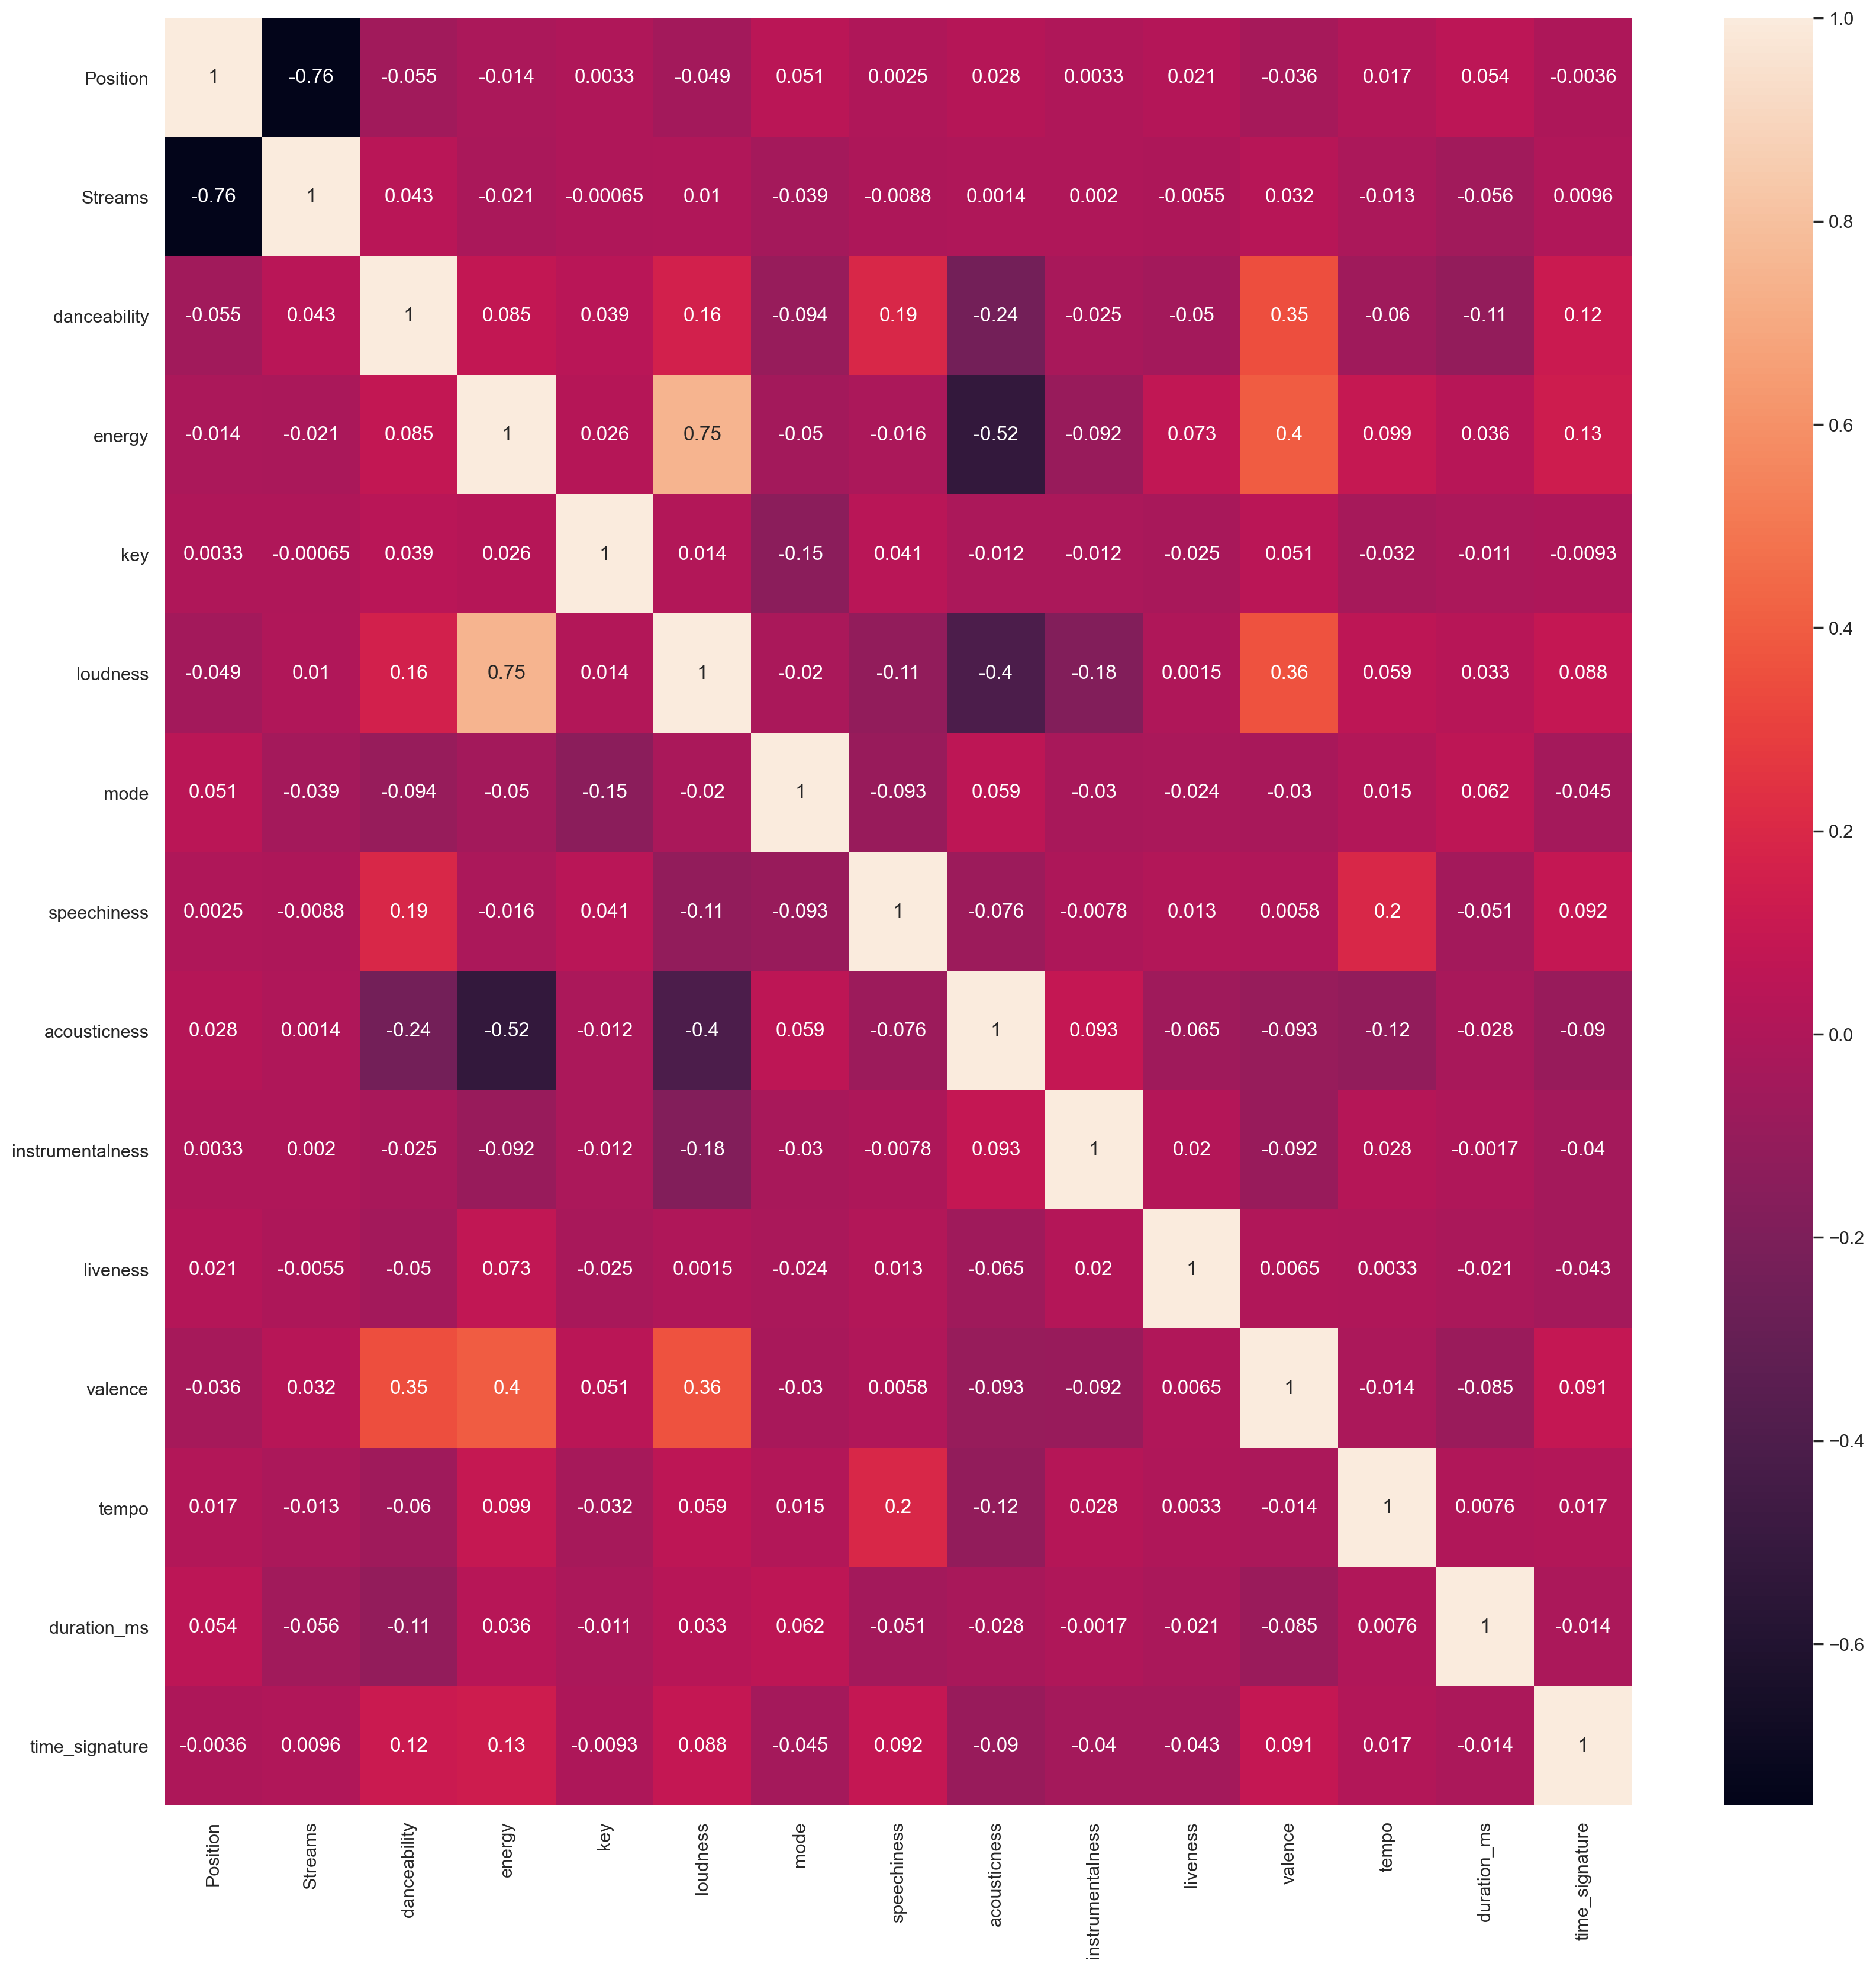

In [117]:
plt.subplots(figsize=(20,20), dpi = 200)
sns.heatmap(global_2017_2020.corr(), annot=True)

# 2.2. Phân tích dữ liệu và kết luận
- Top 10 bài hát nằm trong top trending lâu nhất
- Top 10 ca sĩ có nhiều bài hát trong top trending nhiều nhất
- Xu hướng nghe nhạc của thế giới giai đoạn 2017-2020 
- Đánh giá của tweets về top 10 bài hát nằm trong top trending lâu nhất và rút ra kết luận
- Trong năm 2020, những bài hát nào trong top trending của Việt Nam thuộc top trending thế giới.


## Top 10 bài hát nằm trong top trending lâu nhất



Text(0.5, 1.0, 'Top 10 bài hát nằm trong top 200 lâu nhất')

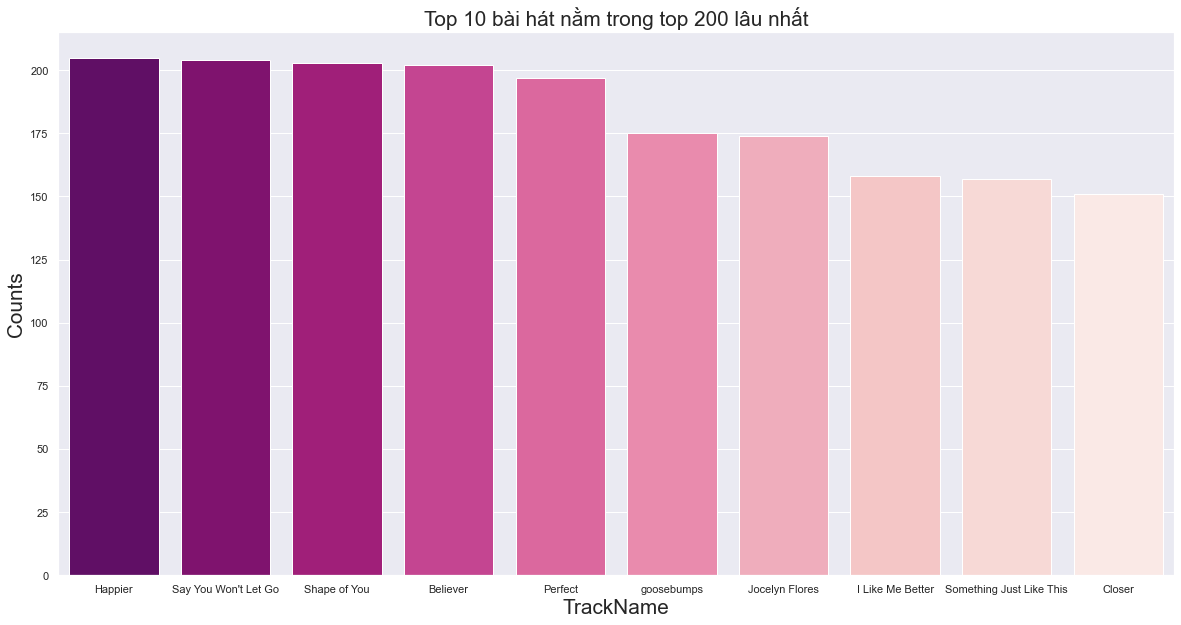

In [119]:
global_2017_2020.TrackName.describe()
trackname_counts=global_2017_2020.TrackName.value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(20,10), facecolor='w')
sns.barplot(trackname_counts.iloc[0:10].index,trackname_counts.iloc[0:10].values,ax=ax,palette="RdPu_r")
plt.xlabel("TrackName",size='xx-large')
plt.ylabel("Counts",size='xx-large')
plt.title("Top 10 bài hát nằm trong top 200 lâu nhất",size ='xx-large')

## Top 10 ca sĩ có nhiều bài hát trong top trending nhiều nhất



In [122]:
global_2017_2020.TrackName.describe()
delete_dup_global_2017_2020=global_2017_2020.drop_duplicates(subset=['TrackName'])
print(delete_dup_global_2017_2020)
  

       Position                                          TrackName  \
0             1                                            Starboy   
1             2                                             Closer   
2             3            Rockabye (feat. Sean Paul & Anne-Marie)   
3             4                                    Let Me Love You   
4             5  I Donâ€™t Wanna Live Forever (Fifty Shades Dar...   
...         ...                                                ...   
41383       184           Why'd You Only Call Me When You're High?   
41392       193                                   Do I Wanna Know?   
41396       197                                   Lance Individual   
41398       199                                       Ponte Pa' Mi   
41399       200                                            Hayloft   

                 Artist   Streams  \
0            The Weeknd  25734078   
1      The Chainsmokers  23519705   
2          Clean Bandit  21216399   
3          

Text(0.5, 1.0, 'Top 10 nghệ sĩ có nhiều bài hát góp mặt vào top 200 nhất')

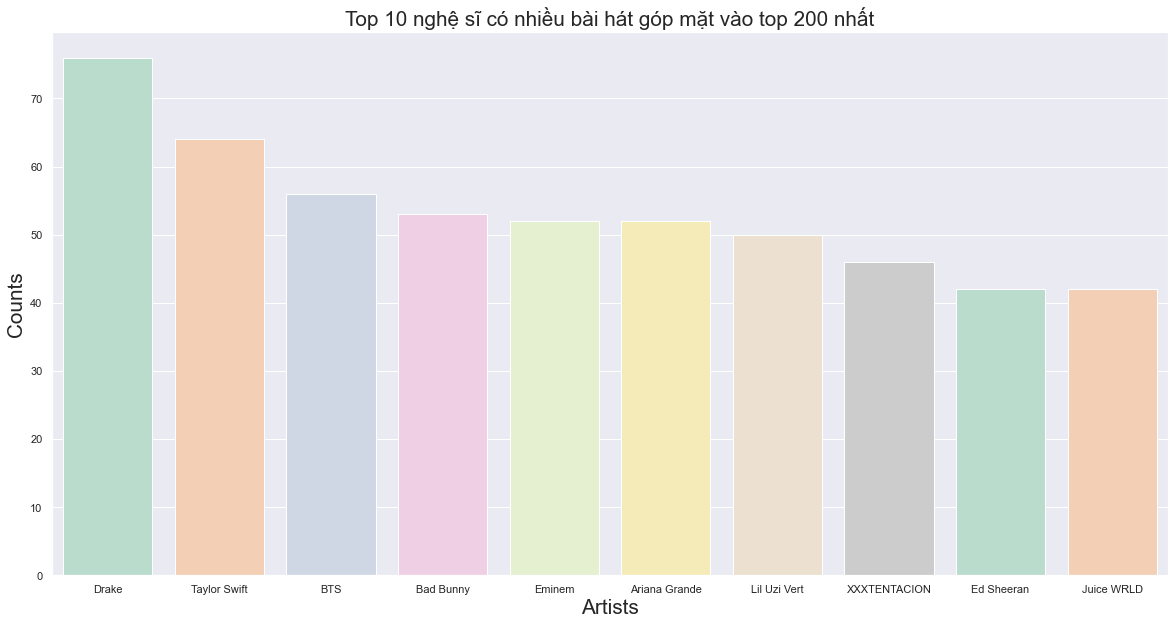

In [123]:
delete_dup_global_2017_2020.TrackName.describe()
artist_counts=delete_dup_global_2017_2020.Artist.value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(20,10), facecolor='w')
sns.barplot(artist_counts.iloc[0:10].index,artist_counts.iloc[0:10].values,ax=ax,palette="Pastel2")
plt.xlabel("Artists",size='xx-large')
plt.ylabel("Counts",size='xx-large')
plt.title("Top 10 nghệ sĩ có nhiều bài hát góp mặt vào top 200 nhất",size ='xx-large')

### Tiến hành WordCloud dữ liệu:


In [124]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [125]:
from wordcloud import WordCloud

In [126]:
Artist_df=delete_dup_global_2017_2020[delete_dup_global_2017_2020.Artist.notnull()]

In [127]:
Artist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354 entries, 0 to 41399
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Position          3354 non-null   int64  
 1   TrackName         3354 non-null   object 
 2   Artist            3354 non-null   object 
 3   Streams           3354 non-null   int64  
 4   URL               3354 non-null   object 
 5   Date              3354 non-null   object 
 6   Id_song           3354 non-null   object 
 7   danceability      3354 non-null   float64
 8   energy            3354 non-null   float64
 9   key               3354 non-null   int64  
 10  loudness          3354 non-null   float64
 11  mode              3354 non-null   int64  
 12  speechiness       3354 non-null   float64
 13  acousticness      3354 non-null   float64
 14  instrumentalness  3354 non-null   float64
 15  liveness          3354 non-null   float64
 16  valence           3354 non-null   float64

In [139]:
artist_txt='\n'.join(Artist_df['Artist'])
print(artist_txt)

The Weeknd
The Chainsmokers
Clean Bandit
DJ Snake
ZAYN
Maroon 5
Drake
James Arthur
Bruno Mars
The Weeknd
Rae Sremmurd
Drake
Shakira
Major Lazer
Starley
Martin Garrix
Migos
Ariana Grande
Steve Aoki
Hailee Steinfeld
Machine Gun Kelly
Shawn Mendes
Calvin Harris
The Chainsmokers
The Chainsmokers
Shawn Mendes
Twenty One Pilots
Justin Timberlake
Alessia Cara
The Vamps
Sia
Sage The Gemini
John Legend
Jonas Blue
CNCO
Alan Walker
Nevada
Zara Larsson
Robin Schulz
Mike Posner
Charlie Puth
Alok
J Balvin
Shelley FKA DRAM
Calvin Harris
Alessia Cara
AminÃ©
Fifth Harmony
Ricky Martin
Zion & Lennox
The Weeknd
NEIKED
Jonas Blue
Sia
Twenty One Pilots
Big Sean
J. Cole
Martin Jensen
Rihanna
Drake
Rag'n'Bone Man
Justin Bieber
Twenty One Pilots
Alan Walker
Justin Bieber
Desiigner
gnash
Noah Cyrus
Adele
DNCE
Sia
Coldplay
Mike Perry
Luke Christopher
Lil Wayne
Major Lazer
The Chainsmokers
Drake
MC G15
Carlos Vives
Little Mix
Ariana Grande
Cashmere Cat
Sebastian Yatra
Petit Biscuit
21 Savage
Rob $tone
Rihanna
Lu

In [140]:
from matplotlib import rcParams 
rcParams['figure.figsize']=15,8
wordcloud = WordCloud(font_path='Caviar.ttf', max_words=2000, max_font_size=40, scale=4).generate(artist_txt)

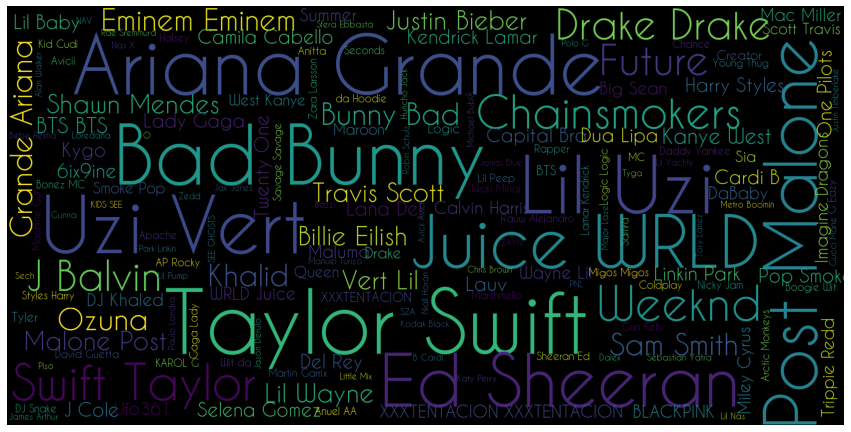

In [143]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [144]:
import numpy as np 
from PIL import Image

In [145]:
mask=np.array(Image.open("spotify.jpg"))

In [146]:
wordcloud = WordCloud(font_path='Caviar.ttf', max_words=500, background_color="White", mask=mask).generate(artist_txt)

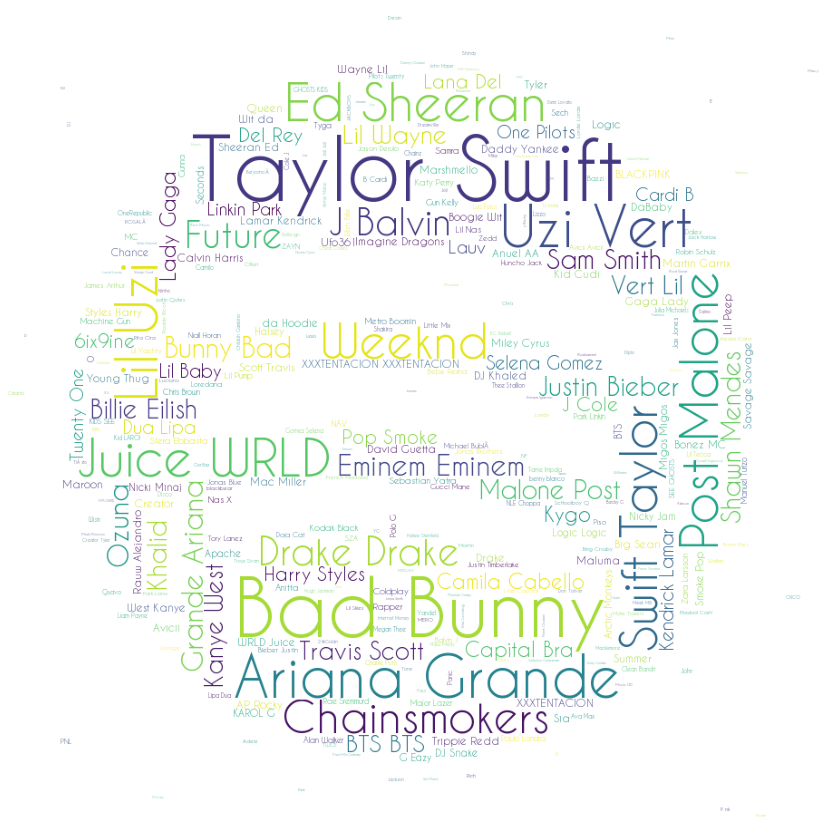

In [147]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Xu hướng nghe nhạc của thế giới giai đoạn 2017-2020 

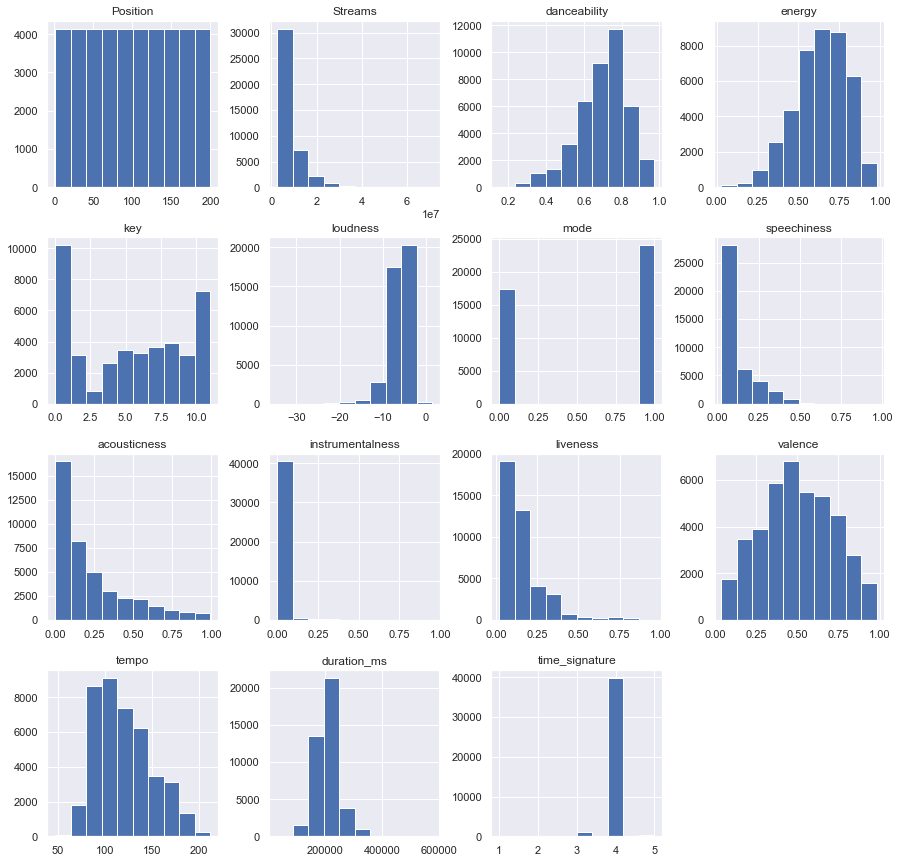

In [4]:
global_2017_2020.hist(figsize = (15,15))
plt.show()

In [73]:
#Import dữ liệu Global
global_2017_2020_new = pd.read_csv(r'E:\UEL\HocTap\Nam3\HKII\PhanTichDuLieuWeb\DOAn\data\final\Global_2017_2020.csv')
global_2017_2020_new.head()

,Position,TrackName,Artist,Streams,URL,Date,Id_song,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,month_year
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,05-01-17,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7,...,1,0.2820,0.1650,0.000003,0.134,0.5350,186.054,230453,4,2017-01
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,05-01-17,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,...,1,0.0338,0.4140,0.000000,0.111,0.6610,95.010,244960,4,2017-01
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,05-01-17,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,...,0,0.0523,0.4060,0.000000,0.180,0.7420,101.965,251088,4,2017-01
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,05-01-17,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8,...,1,0.0576,0.0784,0.000010,0.122,0.1420,199.864,205947,4,2017-01
4,5,I Donâ€™t Wanna Live Forever (Fifty Shades Dar...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,05-01-17,3NdDpSvN911VPGivFlV5d0,0.735,0.451,0,...,1,0.0585,0.0631,0.000013,0.325,0.0862,117.973,245200,4,2017-01


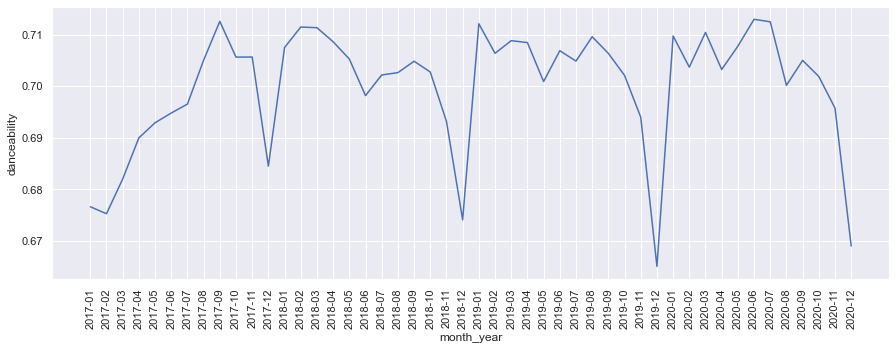

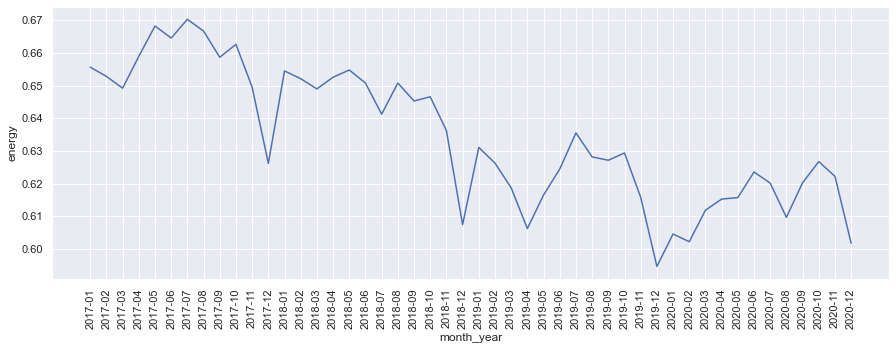

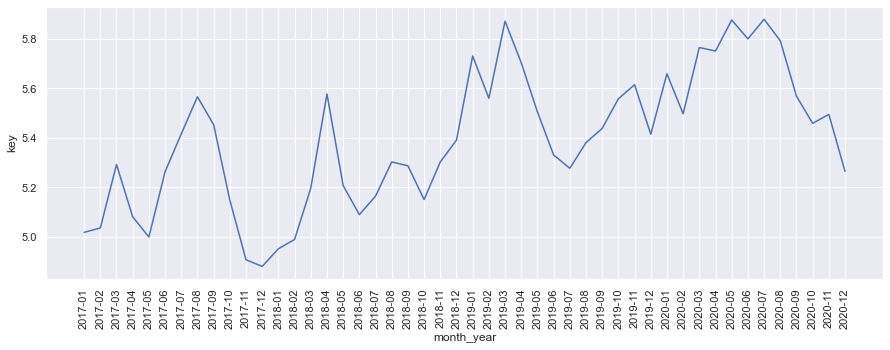

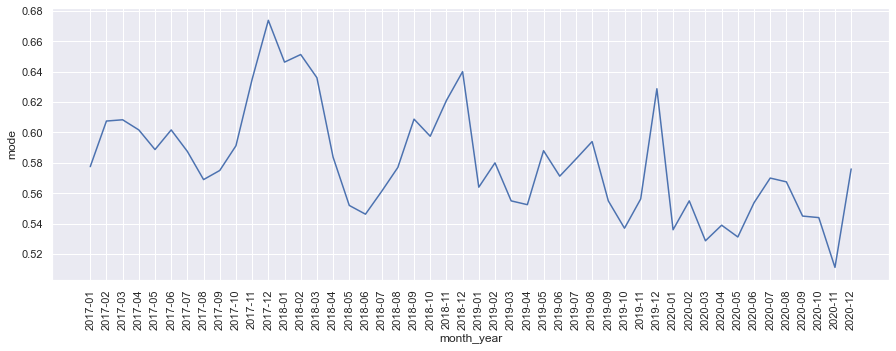

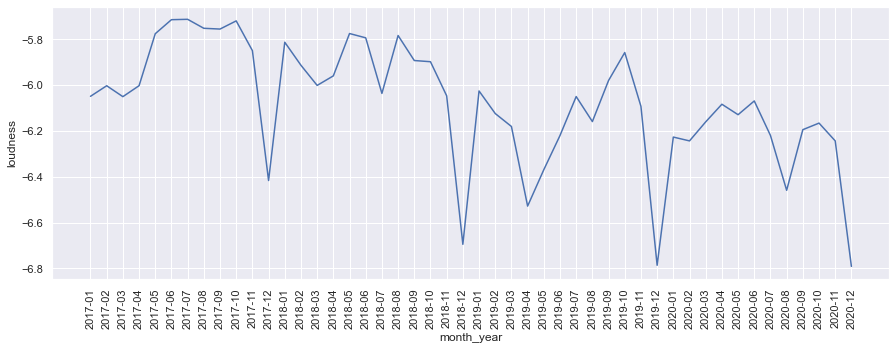

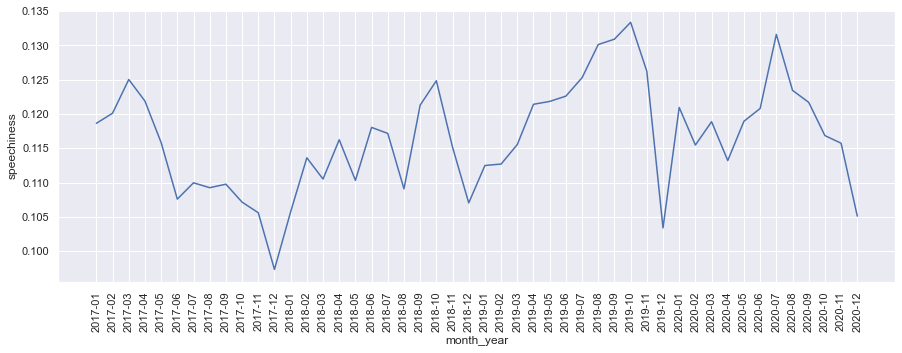

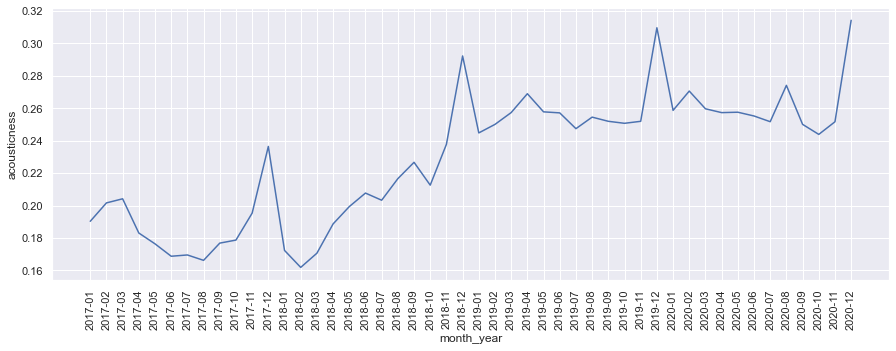

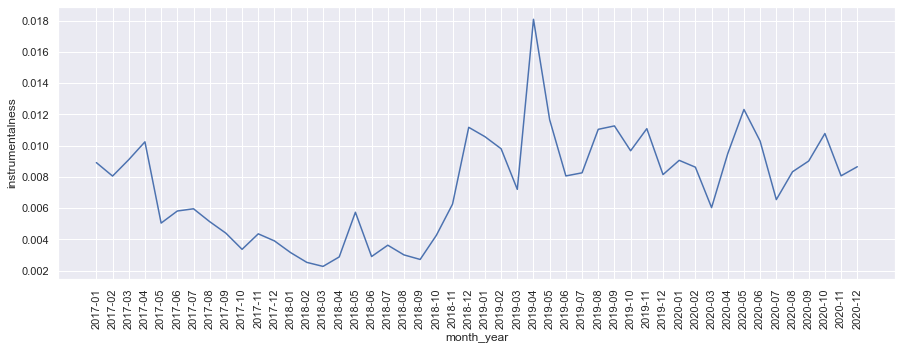

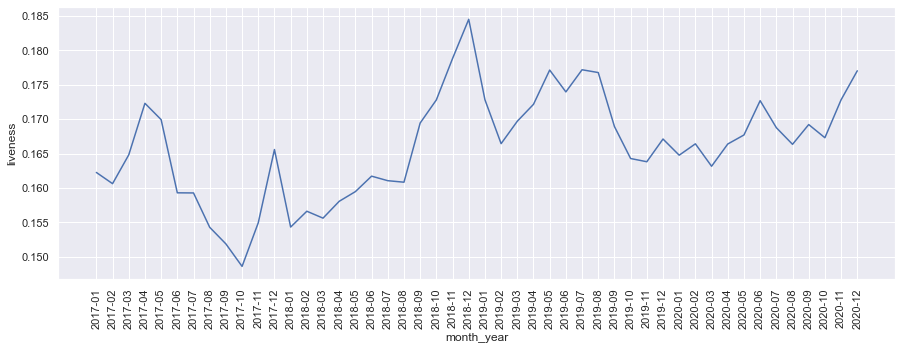

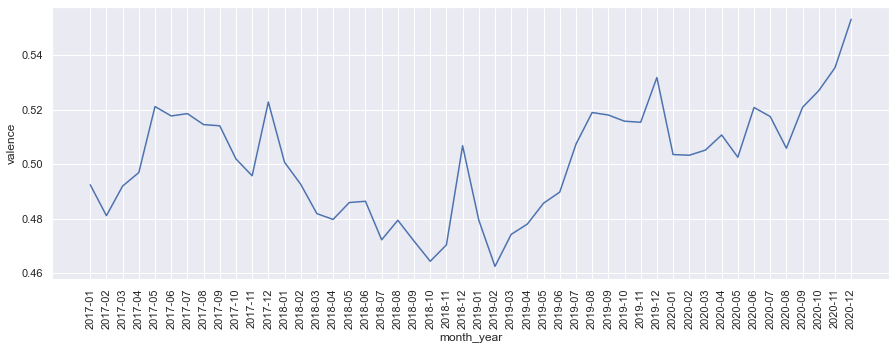

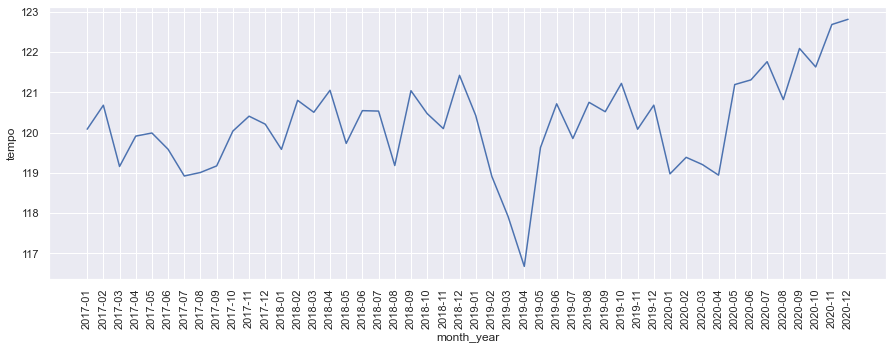

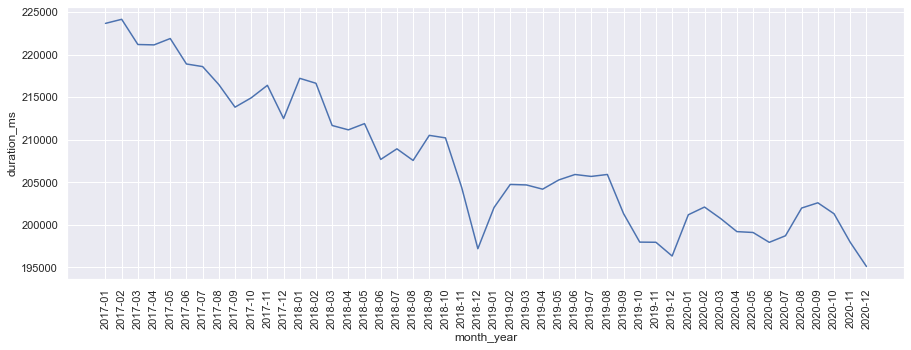

In [74]:
columns = ['danceability','energy','key', 'mode', 'loudness',
          'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
          'tempo', 'duration_ms']
#pd.plotting.register_matplotlib_converters()
for col in columns:
    y = global_2017_2020_new.groupby('month_year')[col].mean()
    x = y.index
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.set_style("darkgrid")
    sns.lineplot(x, y, data=global_2017_2020)

## Đánh giá của tweets về top 10 bài hát nằm trong top trending lâu nhất và rút ra kết luận
code nằm trong file Sentiment_Tweet.ip

## Trong năm 2020, những bài hát nào trong top trending của Việt Nam thuộc top trending thế giới. Tại sao?


In [117]:
#Trích xuất tên bài hát Việt Nam
co_name_song_vn=vietnam_2020["Id_Song"]
#print(co_name_song)
#Loại bỏ tên bài hát trùng
new_name_song_vn=[]
for i in co_name_song_vn:
    if i not in new_name_song_vn:
        new_name_song_vn.append(i)
print(new_name_song_vn)  

['2Jaaw8PrdUfPlU6o6tL5dl', '4TnjEaWOeW0eKTKIEvJyCa', '1rgnBhdG2JDFTbYkYRZAku', '5WHuqG7vz4Hy0BU47fPpVp', '0LQqaXgLL3e3dkPBpkwlGU', '3n2P3ipLt5mPFVaM0fJHNR', '0iBh2ZfirDzFDkqrvkvoiW', '58wyJLv6yH1La9NIZPl3ne', '22F7P7QnaVspdf5rKveBaS', '75kOzkIGZ7WB9s5rOxICf0', '0piLGIj0C7RR4B2gowEqmO', '2nv9DTgVyvV09rgZmougfY', '5dZHey2U2xrNpvgyop8URS', '3VyjsVV24RmBIbWJAeUJNu', '1ooBIqsmV1ocRldBZrvLPD', '2P9M7q49JXnwiab4TosOpW', '4sf6dQ41b9iEVopLnZJD7X', '0nbXyq5TXYPCO7pr3N8S4I', '5pf3f5rhtUnZ1PeTcHKVdz', '5iFwAOB2TFkPJk8sMlxP8g', '2b8fOow8UzyDFAE27YhOZM', '3TMsxtMLlRJAjuaQIOuhXl', '696DnlkuDOXcMAnKlTgXXK', '031jyNUkkD02vrkgZDGJxu', '62yjCIcPBDX9v2XubelRxt', '14v67pBp6W4Q5WV11xUm1V', '5a0nHa7F4S9hb0Zi0zLS8w', '7k4t7uLgtOxPwTpFmtJNTY', '3Dv1eDb0MEgF93GpLXlucZ', '71JPvFZmsb5RYxnUXZuLkz', '7vJyCz6Q8AE13xfPo6iQAz', '172zA5Yn0YzayQWvEJuGAm', '0GdrFeLGWjlEcAfoQEMXH5', '24nK8tW7Pt3Inh2utttuoG', '7N06jo3EnV792VFaG8vuW6', '7AzGrpsT9kTI6OUdMXlHWe', '3yOlyBJuViE2YSGn3nVE1K', '4HBvwhhYo7YiYXkUDrOHzS', '0sf12qNH5q

In [118]:
global_2017_2020['match_vn'] = global_2017_2020.Id_song.isin(new_name_song_vn).astype(int)
print(global_2017_2020)

       Position                                          TrackName  \
0             1                                            Starboy   
1             2                                             Closer   
2             3            Rockabye (feat. Sean Paul & Anne-Marie)   
3             4                                    Let Me Love You   
4             5  I Donâ€™t Wanna Live Forever (Fifty Shades Dar...   
...         ...                                                ...   
41395       196                                     Investe Em Mim   
41396       197                                   Lance Individual   
41397       198                      Ice Cream (with Selena Gomez)   
41398       199                                       Ponte Pa' Mi   
41399       200                                            Hayloft   

                 Artist   Streams  \
0            The Weeknd  25734078   
1      The Chainsmokers  23519705   
2          Clean Bandit  21216399   
3          

In [121]:
# hiển thị dataframe có bài hát thế giới nằm trong top bài hát trending Việt Nam
rslt_df = global_2017_2020[global_2017_2020['match_vn'] == 1]
print(rslt_df)


       Position                             TrackName            Artist  \
13607         8                       This Is America  Childish Gambino   
13800         1                       This Is America  Childish Gambino   
14002         3                       This Is America  Childish Gambino   
14205         6                       This Is America  Childish Gambino   
14413        14                       This Is America  Childish Gambino   
...         ...                                   ...               ...   
41356       157  ily (i love you baby) (feat. Emilee)         Surf Mesa   
41361       162                              Deep End          FousheÃ©   
41375       176                   everything i wanted     Billie Eilish   
41391       192                        Lovesick Girls         BLACKPINK   
41397       198         Ice Cream (with Selena Gomez)         BLACKPINK   

        Streams                                                URL       Date  \
13607  21599165  h

In [123]:
#xóa cột stream,Position, Date
de_rslt_df=rslt_df.drop(['Streams', 'Position','Date', "year",  "month",  "month_year" ], axis = 1)

#xoá dữ liệu trùng

Dup_Rows = de_rslt_df[de_rslt_df.duplicated()]

DF_RM_DUP = de_rslt_df.drop_duplicates(keep='last')

print(DF_RM_DUP)

                                  TrackName         Artist  \
23470                       Intro : Persona            BTS   
23709                         Make It Right            BTS   
23724                                  HOME            BTS   
23729                              Dionysus            BTS   
23760                             Jamais Vu            BTS   
...                                     ...            ...   
41356  ily (i love you baby) (feat. Emilee)      Surf Mesa   
41361                              Deep End       FousheÃ©   
41375                   everything i wanted  Billie Eilish   
41391                        Lovesick Girls      BLACKPINK   
41397         Ice Cream (with Selena Gomez)      BLACKPINK   

                                                     URL  \
23470  https://open.spotify.com/track/2isSdmQfVv32j2h...   
23709  https://open.spotify.com/track/6KUE0HSSudAp9AO...   
23724  https://open.spotify.com/track/7lthOBXNue2Ived...   
23729  https://

In [172]:
DF_RM_DUP.to_csv(r'E:\UEL\HocTap\Nam3\HKII\PhanTichDuLieuWeb\DOAn\data\final\trending_global_vn.csv')


#### Top 10  bài hát được nghe nhiều nhất

Text(0.5, 1.0, 'Top 10 bài hát trong top trending Việt Nam thuộc top trending global ')

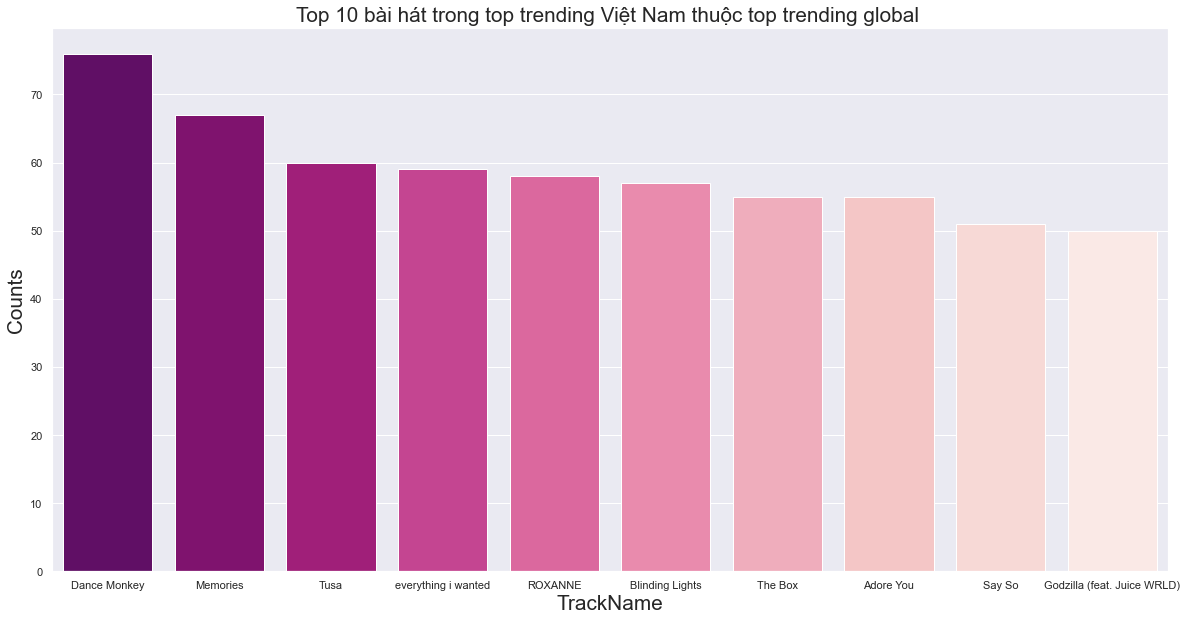

In [174]:
rslt_df.TrackName.describe()
trackname_counts=rslt_df.TrackName.value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(20,10), facecolor='w')
sns.barplot(trackname_counts.iloc[0:10].index,trackname_counts.iloc[0:10].values,ax=ax,palette="RdPu_r")
plt.xlabel("TrackName",size='xx-large')
plt.ylabel("Counts",size='xx-large')
plt.title("Top 10 bài hát trong top trending Việt Nam thuộc top trending global ",size ='xx-large')

Text(0.5, 1.0, 'Top 10 ca sĩ có lượt xuất hiện các bài hát nhiều nhất')

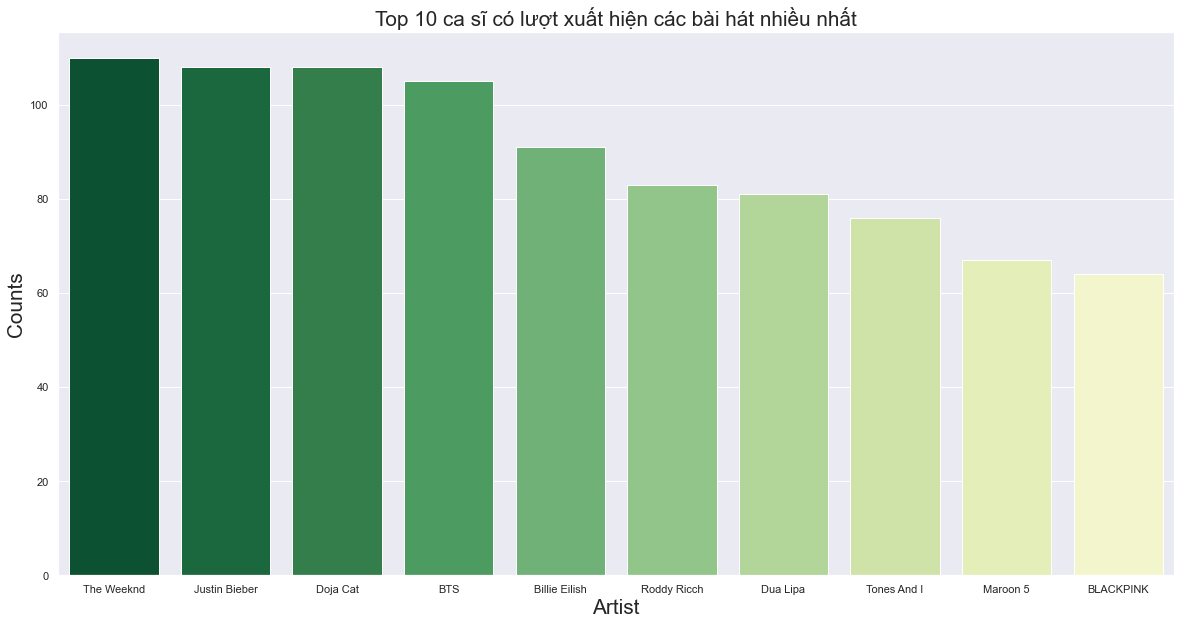

In [104]:
rslt_df.Artist.describe()
artist_counts=rslt_df.Artist.value_counts().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(20,10), facecolor='w')
sns.barplot(artist_counts.iloc[0:10].index,artist_counts.iloc[0:10].values,ax=ax,palette="YlGn_r")
plt.xlabel("Artist",size='xx-large')
plt.ylabel("Counts",size='xx-large')
plt.title("Top 10 ca sĩ có lượt xuất hiện các bài hát nhiều nhất",size ='xx-large')

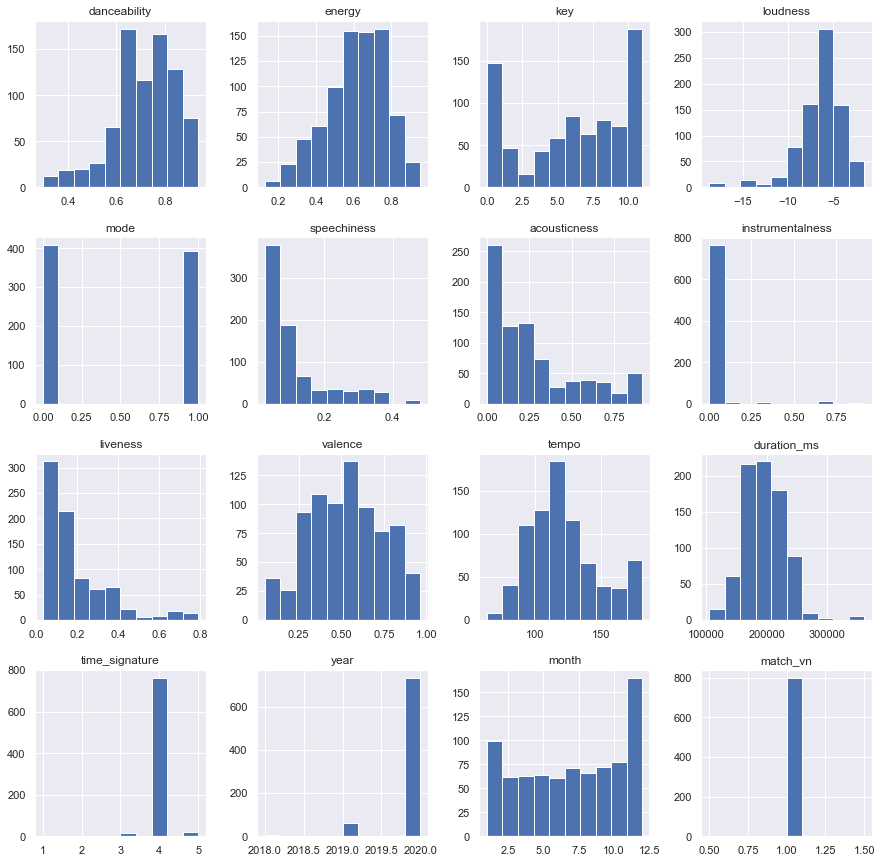

In [106]:
DF_RM_DUP.hist(figsize = (15,15))
plt.show()

Text(0.5, 0, 'Year')

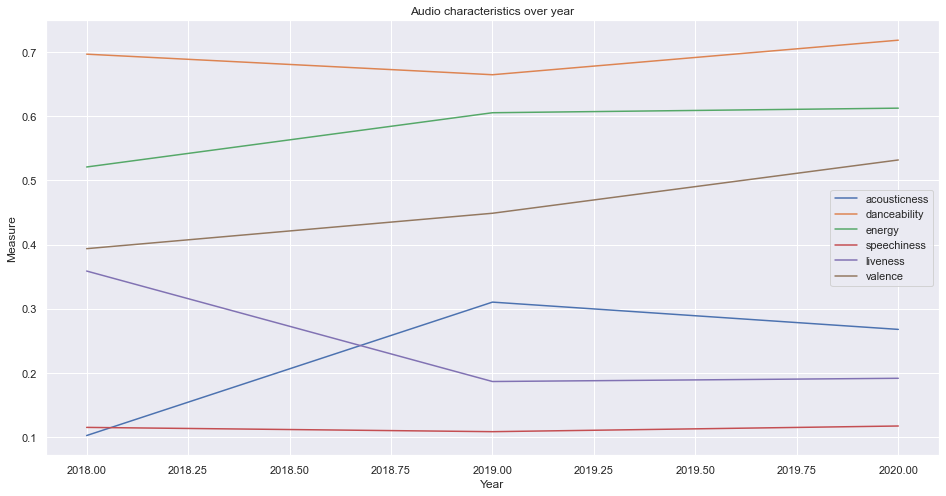

In [107]:
plt.figure(figsize=(16, 8))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = DF_RM_DUP.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col) #label=col=> Hiện bảng chú thích(góc trên cùng bên phải)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')